**Import Libraries & Load Dataset**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/train.csv (2).zip")

df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


**Data cleaning **

In [2]:
df['date'] = pd.to_datetime(df['date'])

# Extract date-based features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek

**Regression **

In [3]:
hold = pd.read_csv("/content/holidays_events.csv")
hold['date'] = pd.to_datetime(hold['date'])

# Merge holiday info with main data
df = df.merge(hold[['date','type']], on='date', how='left')

# Convert holiday type into binary
df['is_holiday'] = np.where(df['type'].isna(), 0, 1)

In [8]:
#Final features
X = df[['onpromotion', 'month', 'day_of_week', 'is_holiday']]
y = df['sales']

**Train Test Split**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
#Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Evaluate the Model**

In [14]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 980924.8198567651
R² Score: 0.18002130533980587


**Visualize Predicted vs Actual Sales**

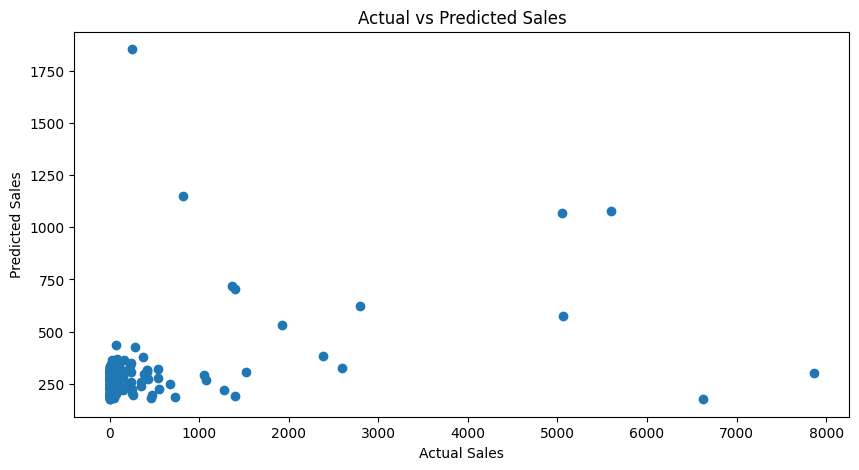

In [15]:
plt.figure(figsize=(10,5))
plt.scatter(y_test[:200], y_pred[:200])  # visualize 200 points
plt.title("Actual vs Predicted Sales")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()